Atalov S.

### Fundamentals of Machine Learning and Artificial Intelligence

## Logistic Regression Implementation (Bonus)

-----

In [1]:
import numpy as np
import math

In [23]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Constructor for the LogisticRegression.
        """
        # Initialize the learning rate and number of iterations for gradient descent
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        # Initialize weights and bias to None; they will be set in the fit method
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        """
        Compute the sigmoid of z.

        Parameters:
        z (np.array): Input array.

        Returns:
        np.array: The sigmoid of each element in z.
        """
        # Sigmoid function: maps input 'z' to a value between 0 and 1
        s = 1 / (1 + np.exp(-z))
        return s

    def _compute_cost(self, X, y):
        # Compute the cost (logistic loss) between actual values 'y' and predictions
        m = X.shape[0]
        
        y_predicted = np.dot(X, self.weights) + self.bias
        cost = -1/m * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
        
        return cost

    def _gradients(self, X, y):
        """
        Compute gradient to update coef.

        Parameters:
        X (np.array): Training features.
        y (np.array): Training labels.

        Returns:
        tuple: Gradients dw and db.
        """
        n_samples, n_features = X.shape
        
        y_predicted = np.dot(X, self.weights) + self.bias
        
        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)
        
        return (dw, db)
    
    def fit(self, X, y):
        """
        Fit the logistic regression model to the training data.

        Parameters:
        X (np.array): Training features.
        y (np.array): Training labels.
        """
        # Fit the logistic regression model to the training data
        n_samples, n_features = X.shape
        
        # Initialize weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):

            y_predicted = np.dot(X, self.weights) + self.bias
            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """
        Predict the class labels for the given features.

        Parameters:
        X (np.array): Features to predict.

        Returns:
        np.array: Predicted class labels.
        """
        # Make predictions using the learned weights and bias
        
        
        y_predicted = self._sigmoid(np.dot(X, self.weights) + self.bias)
        
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted] # Threshold is 0.5
        
        return np.array(y_predicted_cls)

    def accuracy(self, X, y):
        """
        Calculate the accuracy of the model on a given dataset.

        Parameters:
        X (np.array): Features of the dataset.
        y (np.array): True labels of the dataset.

        Returns:
        float: The accuracy of the model.
        """
        # Calculate the accuracy of the model on a given dataset
        y_pred = self.predict(X)
        accuracy = np.sum(y == y_pred) / len(y)
        return accuracy


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
import matplotlib.pyplot as plt

In [26]:
# Function to generate random data points for two classes
def generate_data():
    np.random.seed(0)
    # Class 0: Random points around (2, 2)
    class_0 = np.random.randn(100, 2) + np.array([2, 2])
    
    # Class 1: Random points around (6, 6)
    class_1 = np.random.randn(100, 2) + np.array([6, 6])
    
    # Combine both classes
    data = np.vstack([class_0, class_1])
    labels = np.array([0] * 100 + [1] * 100)  # Class labels (0 for class 0, 1 for class 1)
    
    return data, labels

# Generate random data
X, y = generate_data()

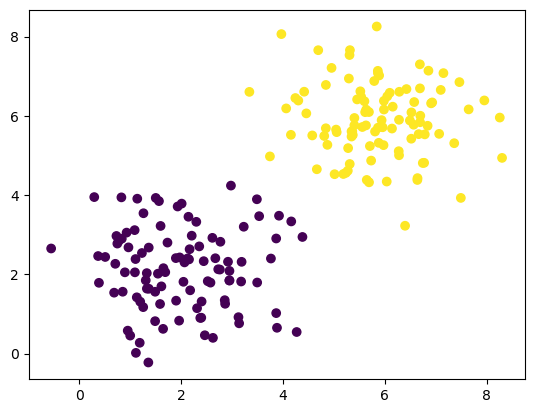

In [27]:
plt.scatter(X[:,0], X[:, 1], c = y)

In [28]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Create an instance of the LogisticRegression class
model = LogisticRegression(learning_rate=0.01, n_iterations=1000)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.60
